# Analyzing Riders' Usage in a Cyclistic Bike-sharing Program
**A Capstone Project of the Google Data Analytics Professional Certificate**

# Introduction

A case study about Cyclistic, a bike-share company in Chicago. The company has grown since its launch in 2016 and has a fleet of over 5,800 bicycles that are geo-tracked and locked into a network across 692 stations in the city.

While the marketing strategy has focused on general awareness and broad consumer segments, the finance team has concluded that annual members are more profitable than casual riders.

To maximize future growth, the marketing team is now focused on converting casual riders into annual members. The team aims to understand the differences between the two groups, casual members and annual members, by analyzing Cyclistic’s historical bike trip data.

The case study attempts to know how a bike-sharing program navigates speedy success by examining the usage patterns of annual members and casual riders.

### Analysis Process

The flow of this case study will be structured following the data analysis process which are as follows;

- Ask
- Prepare
- Process
- Analyze
- Share
- Act

# Ask

During my engagement with the key stakeholders, including the Director of Marketing, the Cyclistic Marketing Analytics team, and the Cyclistic Executive team, I gained valuable insights into the company’s business model. This enabled me to identify the challenges and determine the precise business tasks at hand and expected deliverable.

## Project Deliverable

To maximize future growth of the company by identifying how annual members and casual riders use Cyclistic bikes differently and converting casual riders into annual members.

# Prepare

This project utilizes Cyclistic’s historical customer trip data from the past 12 months (January to December 2022). The data has been collected from the [source](https://divvy-tripdata.s3.amazonaws.com/index.html) and saved for analysis.

In preparation for my analysis, I will be setting up my R environment by loading the necessary packages, and the customer trip data for 12 months.

In [1]:
## Setting up my R environment
library(tidyverse)
library(janitor)
library(lubridate)
library(cowplot)
library(hms)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘hms’


The following object is masked from ‘package:lubridate’:

    hms




In [2]:
## Load Riders Trip for 12 Months

jan <- read.csv("/kaggle/input/cyclistic-bike-share-2022/202201-divvy-tripdata/202201-divvy-tripdata.csv")
feb <- read.csv("/kaggle/input/cyclistic-bike-share-2022/202202-divvy-tripdata/202202-divvy-tripdata.csv")
mar <- read.csv("/kaggle/input/cyclistic-bike-share-2022/202203-divvy-tripdata/202203-divvy-tripdata.csv")
apr <- read.csv("/kaggle/input/cyclistic-bike-share-2022/202204-divvy-tripdata/202204-divvy-tripdata.csv")
may <- read.csv("/kaggle/input/cyclistic-bike-share-2022/202205-divvy-tripdata/202205-divvy-tripdata.csv")
jun <- read.csv("/kaggle/input/cyclistic-bike-share-2022/202206-divvy-tripdata/202206-divvy-tripdata.csv")
jul <- read.csv("/kaggle/input/cyclistic-bike-share-2022/202207-divvy-tripdata/202207-divvy-tripdata.csv")
aug <- read.csv("/kaggle/input/cyclistic-bike-share-2022/202208-divvy-tripdata/202208-divvy-tripdata.csv")
sep <- read.csv("/kaggle/input/cyclistic-bike-share-2022/202209-divvy-tripdata/202209-divvy-publictripdata.csv")
oct <- read.csv("/kaggle/input/cyclistic-bike-share-2022/202210-divvy-tripdata/202210-divvy-tripdata.csv")
nov <- read.csv("/kaggle/input/cyclistic-bike-share-2022/202211-divvy-tripdata/202211-divvy-tripdata.csv")
dec <- read.csv("/kaggle/input/cyclistic-bike-share-2022/202212-divvy-tripdata/202212-divvy-tripdata.csv")

In [3]:
## Glimpse
glimpse(jan)
glimpse(feb)
glimpse(mar)
glimpse(apr)
glimpse(may)
glimpse(jun)
glimpse(jul)
glimpse(aug)
glimpse(sep)
glimpse(oct)
glimpse(nov)
glimpse(dec)

Rows: 103,770
Columns: 13
$ ride_id            <chr> "C2F7DD78E82EC875", "A6CF8980A652D272", "BD0F91DFF7…
$ rideable_type      <chr> "electric_bike", "electric_bike", "classic_bike", "…
$ started_at         <chr> "2022-01-13 11:59:47", "2022-01-10 08:41:56", "2022…
$ ended_at           <chr> "2022-01-13 12:02:44", "2022-01-10 08:46:17", "2022…
$ start_station_name <chr> "Glenwood Ave & Touhy Ave", "Glenwood Ave & Touhy A…
$ start_station_id   <chr> "525", "525", "TA1306000016", "KA1504000151", "TA13…
$ end_station_name   <chr> "Clark St & Touhy Ave", "Clark St & Touhy Ave", "Gr…
$ end_station_id     <chr> "RP-007", "RP-007", "TA1307000001", "TA1309000021",…
$ start_lat          <dbl> 42.01280, 42.01276, 41.92560, 41.98359, 41.87785, 4…
$ start_lng          <dbl> -87.66591, -87.66597, -87.65371, -87.66915, -87.624…
$ end_lat            <dbl> 42.01256, 42.01256, 41.92533, 41.96151, 41.88462, 4…
$ end_lng            <dbl> -87.67437, -87.67437, -87.66580, -87.67139, -87.627…
$ member_casua

The data is a comma-delimited (.CSV) format and contains 13 columns for each month with the following attributes:

* **ride_id:** A unique number for the particular trip
* **rideable_type:** Type of bikes (electric_bike, classic_bike, docked_bike)
* **started_at:** Timestamp for when the trip commenced
* **ended_at:** Timestamp for when the trip ended
* **start_station_name:** Station from where trip commenced
* **start_station_id:** Unique id for station where trip started
* **end_station_name:** Station from where trip ended
* **end_station_id:** Unique id for station where trip ended
* **start_lat:** Latitude of where trip started
* **start_lng:** Longitude of where trip started
* **end_lat:** Latitude of where trip ended
* **end_lng:** Longitude of where trip ended
* **member_casual:** Status of customer; casual means ‘not subscribed’, member means ‘subscribed’

This project utilizes a public dataset made available by Motivate International Inc under a specific license for usage in [Index of bucket”divvy-tripdata”](https://divvy-tripdata.s3.amazonaws.com/index.html). The dataset adheres to guidelines ensuring data integrity, credibility, privacy, security, and accessibility.

In [4]:
## Combination of jan - dec dataframes (i.e customers' trip from January to December) into a single dataframe 
df <- bind_rows(jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec)

# Display
head(df)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual
2,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual
3,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member
4,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual
5,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member
6,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member


In [5]:
## Check combined dataframe
summary(df)
glimpse(df)

   ride_id          rideable_type       started_at          ended_at        
 Length:5667717     Length:5667717     Length:5667717     Length:5667717    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5667717     Length:5667717     Length:5667717     Length:5667717    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

Rows: 5,667,717
Columns: 13
$ ride_id            <chr> "C2F7DD78E82EC875", "A6CF8980A652D272", "BD0F91DFF7…
$ rideable_type      <chr> "electric_bike", "electric_bike", "classic_bike", "…
$ started_at         <chr> "2022-01-13 11:59:47", "2022-01-10 08:41:56", "2022…
$ ended_at           <chr> "2022-01-13 12:02:44", "2022-01-10 08:46:17", "2022…
$ start_station_name <chr> "Glenwood Ave & Touhy Ave", "Glenwood Ave & Touhy A…
$ start_station_id   <chr> "525", "525", "TA1306000016", "KA1504000151", "TA13…
$ end_station_name   <chr> "Clark St & Touhy Ave", "Clark St & Touhy Ave", "Gr…
$ end_station_id     <chr> "RP-007", "RP-007", "TA1307000001", "TA1309000021",…
$ start_lat          <dbl> 42.01280, 42.01276, 41.92560, 41.98359, 41.87785, 4…
$ start_lng          <dbl> -87.66591, -87.66597, -87.65371, -87.66915, -87.624…
$ end_lat            <dbl> 42.01256, 42.01256, 41.92533, 41.96151, 41.88462, 4…
$ end_lng            <dbl> -87.67437, -87.67437, -87.66580, -87.67139, -87.627…
$ member_cas

# Process

The total combination of customers' trip data for the year 2022 has a total rows 5,667,717 and 13 columns.

At this stage, I will be conducting a thorough review of the data, perform data cleaning process to eliminate any possible errors, inaccuracies, or inconsistencies, data manipulation and data transformation. To determine its suitability for answering the business task and enable me work effectively.

## i. Checks for error

#### a. Check for unique value
#### b. Check for blank spaces in the data
#### c. Check columns for accuracy
#### d. others

## ii. Data transformation and manipulation

#### a. Creating new columns
#### b. Sorting
#### c. Data Cleaning

In [6]:
# Checks for error
## a. Check count of unique value for each column
sapply(df, n_distinct)

ride_id      rideable_type         started_at           ended_at 
           5667717                  3            4745862            4758633 
start_station_name   start_station_id   end_station_name     end_station_id 
              1675               1314               1693               1318 
         start_lat          start_lng            end_lat            end_lng 
            668348             631046               1607               1591 
     member_casual 
                 2

In [7]:
# Checks for error
## b. Checking for blank spaces in the data
cbind(lapply(df, function(x) sum(is.na(x) | x == "")))

ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,833064
start_station_id,833064
end_station_name,892742
end_station_id,892742
start_lat,0
start_lng,0
end_lat,5858


However, during this process blank spaces were found in **start_station_name, start_station_id, end_station_name, end_station_id, end_lat and end_lng**

In [8]:
# Checks for error
## c. Check columns for Unique attributes

unique(df$rideable_type)
unique(df$member_casual)

[1] "electric_bike" "classic_bike"  "docked_bike"

[1] "casual" "member"

The values inside the two columns (rideable_type and member_casual) were accurate and free from typo errors. Examining other columns will be too large as they reflect ride_id across 692 sations in the city.

In [9]:
# Data Transformation and Manipulation
## a. Creating new columns: ride_length, day_of_week, ride_month, yearly_season

df <- df %>% 
  mutate(ride_length = hms::as_hms(difftime(ended_at,started_at))) %>% 
  mutate(day_of_week = wday(df$started_at, label=TRUE)) %>%
  mutate(ride_month=month(df$started_at, label=TRUE)) %>% 
  mutate(yearly_season = case_when(
    ride_month %in% c("Jan", "Feb", "Mar") ~ "Winter",
    ride_month %in% c("Apr", "May", "Jun") ~ "Spring",
    ride_month %in% c("Jul", "Aug", "Sep") ~ "Summer",
    ride_month %in% c("Oct", "Nov", "Dec") ~ "Fall"
  ))

# Display
head(df, n=2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,ride_month,yearly_season
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<ord>,<ord>,<chr>
1,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,00:02:57,Thu,Jan,Winter
2,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,00:04:21,Mon,Jan,Winter


After adding the new columns, there are now 17 columns in the dataframe.

In [10]:
# Data Transformation and Manipulation
## b. Sorting: Sort dataframe by ride_length in descending order

df2 <- df[order(df$ride_length, decreasing = FALSE),]

# Display
head(df2, n=4)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,ride_month,yearly_season
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<ord>,<ord>,<chr>
4305948,E137518FFE807752,electric_bike,2022-09-28 11:04:32,2022-09-21 06:31:11,Cornell Dr & Hayes Dr,653,,,41.78058,-87.58517,41.78000,-87.5900,member,-172:33:21,Wed,Sep,Summer
4743743,918F745F62CAC29E,classic_bike,2022-10-13 14:42:10,2022-10-13 11:53:28,Wilton Ave & Diversey Pkwy*,chargingstx0,Wilton Ave & Diversey Pkwy*,chargingstx0,41.93242,-87.65270,41.93242,-87.6527,member,- 02:48:42,Thu,Oct,Fall
2095201,38B9F148CE80499B,electric_bike,2022-06-07 19:23:03,2022-06-07 17:05:38,,,,,41.93000,-87.79000,41.93000,-87.7900,casual,- 02:17:25,Tue,Jun,Spring
1635638,B897BE02B21FA75E,electric_bike,2022-06-07 19:15:39,2022-06-07 17:05:37,,,Kostner Ave & North Ave,519,41.90000,-87.74000,41.91000,-87.7400,casual,- 02:10:02,Tue,Jun,Spring


In [11]:
# Data Transformation and Manipulation
## c. Data Cleaning: Cleaning data with negative or zero ride_length

df_clean <- df[!(df$ride_length <= 0),]

# Display 
head(df_clean)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,ride_month,yearly_season
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<ord>,<ord>,<chr>
1,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,00:02:57,Thu,Jan,Winter
2,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,00:04:21,Mon,Jan,Winter
3,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,00:04:21,Tue,Jan,Winter
4,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,00:14:56,Tue,Jan,Winter
5,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,00:06:02,Thu,Jan,Winter
6,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,00:03:22,Tue,Jan,Winter


In [12]:
dim(df_clean)

[1] 5667186      17

After removing rows with negative or zero ride_length, the total number of remaining rows in the cleaned dataframe is 5,667,186. Specifically, it was found that 531 rows had negative or zero values for the ride_length variable.

In [13]:
# Data Transformation and Manipulation
## c. Data Cleaning: Removing columns with blank spaces

df_clean2 <- subset(df_clean, select = c(ride_id, started_at, ended_at, start_lat, start_lng, rideable_type, member_casual, ride_length, day_of_week, ride_month, yearly_season))

# Display
head(df_clean2, n =3)

,ride_id,started_at,ended_at,start_lat,start_lng,rideable_type,member_casual,ride_length,day_of_week,ride_month,yearly_season
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<time>,<ord>,<ord>,<chr>
1,C2F7DD78E82EC875,2022-01-13 11:59:47,2022-01-13 12:02:44,42.01280,-87.66591,electric_bike,casual,00:02:57,Thu,Jan,Winter
2,A6CF8980A652D272,2022-01-10 08:41:56,2022-01-10 08:46:17,42.01276,-87.66597,electric_bike,casual,00:04:21,Mon,Jan,Winter
3,BD0F91DFF741C66D,2022-01-25 04:53:40,2022-01-25 04:58:01,41.92560,-87.65371,classic_bike,member,00:04:21,Tue,Jan,Winter


In [14]:
dim(df_clean2)

[1] 5667186      11

After removing columns with blank spaces, the cleaned dataset now contains a total of 11 columns. It is unclear why some columns had blank spaces, and further investigation may be necessary to determine the cause. However, it is important to note that only the columns that are complete and free from errors will be used for the analysis, and the remaining columns with blank spaces will not be included.

# Analyze

The current stage of this project involves conducting descriptive and comparative analysis with the objective of identifying trends and patterns. The findings will enable us to make accurate predictions and draw well-informed conclusions and recommendations.

## i. Descriptive Analysis

#### a. Count
#### b. Average ride length
#### c. Maximum ride length
#### d. Mode

## ii. Comparative Analysis

#### a. Comparison of count
#### b. Comparison of average
#### c. Comparison of max
#### d. Comparison of mode

In [15]:
# Descriptive Analysis
## Count: Total Ride
total_count <- df_clean2 %>% 
  count(ride_id) %>% 
  summarise(total_ride_count = n ())

#Display
total_count

total_ride_count
<int>
5667186


In [16]:
# Descriptive Analysis
## Count: Days of the week
day_count <- df_clean2 %>% 
  group_by(day_of_week) %>% 
  summarise(Count_of_days = n())

# Display
day_count

day_of_week,Count_of_days
<ord>,<int>
Sun,776161
Mon,750954
Tue,782290
Wed,798175
Thu,841512
Fri,801718
Sat,916376


Based on the descriptive analysis provided above, Saturday has the highest count, indicating a greater number of riders than any other day of the week.

In [17]:
# Descriptive Analysis
## Count: Months of the year
month_count <- df_clean2 %>% 
  group_by(ride_month) %>% 
  summarise(Count_by_month = n())

# Display
month_count

ride_month,Count_by_month
<ord>,<int>
Jan,103765
Feb,115604
Mar,284024
Apr,371218
May,634810
Jun,769138
Jul,823416
Aug,785855
Sep,701267


Based on the descriptive analysis provided above, the month of July has the highest count, indicating a greater number of riders than any other month of the year.

In [18]:
# Descriptive Analysis
## Count: by seasons of the year
season_count <- df_clean2 %>% 
  group_by(yearly_season) %>% 
  summarise(count_by_season = n())

# Display
season_count

yearly_season,count_by_season
<chr>,<int>
Fall,1078089
Spring,1775166
Summer,2310538
Winter,503393


Based on the analysis provided above, summer season has the highest count, indicating a greater number of riders in summer than any other season of the year.

In [19]:
# Descriptive Analysis
## Average: ride length

round_hms(as_hms(mean(df_clean2$ride_length)), digits = -1)

00:19:30

The average ride length for both casual and annual members is 19 minutes and 30 seconds.

In [20]:
# Descriptive Analysis
## Average Ride length by week
avg_ride_length_week <- df_clean2 %>% 
  group_by(day_of_week ) %>% 
  summarise(avg_ride_by_week = round_hms(as_hms(mean(ride_length)), digits = -1),
            .groups = "drop")
# Display
avg_ride_length_week

day_of_week,avg_ride_by_week
<ord>,<time>
Sun,00:24:00
Mon,00:18:30
Tue,00:16:40
Wed,00:16:30
Thu,00:17:10
Fri,00:19:00
Sat,00:23:40


The average ride duration is presented on a weekly basis, with Sunday and Saturday exhibiting the highest average ride duration.

In [21]:
# Descriptive Analysis
## Average Ride length by Month
avg_ride_length_month <- df_clean2 %>% 
  group_by(ride_month) %>% 
  summarise(average_ride_month = round_hms(as_hms(mean(ride_length)), digits = -1),
            .groups = "drop")
# Display
avg_ride_length_month

ride_month,average_ride_month
<ord>,<time>
Jan,00:15:20
Feb,00:14:10
Mar,00:18:30
Apr,00:17:40
May,00:21:10
Jun,00:22:40
Jul,00:21:20
Aug,00:20:40
Sep,00:19:20


The average ride duration is presented on a monthly basis with May, June, July, August exhibiting an average ride duration above 20 minutes.

In [22]:
# Descriptive Analysis
## Average ride length by season
avg_ride_length_season <- df_clean2 %>% 
  group_by(yearly_season) %>% 
  summarise(average_ride_by_season = round_hms(as_hms(mean(ride_length)), digits = -1),
            .groups = "drop")
# Display
avg_ride_length_season

yearly_season,average_ride_by_season
<chr>,<time>
Fall,00:15:40
Spring,00:21:00
Summer,00:20:30
Winter,00:16:50


The above analysis has revealed that the average ride duration is higher during the spring and summer seasons and lower during the winter and fall seasons. Indicating that riders are more active during that period of the year.

In [23]:
# Descriptive Analysis
## Maximum ride length
round_hms(as_hms(max(df_clean2$ride_length)), digits = -1)

689:47:20

The maximum duration of a ride is 689 hours, 47 minutes, and 20 seconds.

In [24]:
# Descriptive Analysis
# Maximum ride length by week
max_ride_length_week <- df_clean2 %>% 
  group_by(day_of_week) %>% 
  summarise(max_ride_by_week = round_hms(as_hms(max(ride_length)), digits = -1),
            .groups = "drop")

# Display
max_ride_length_week

day_of_week,max_ride_by_week
<ord>,<time>
Sun,604:17:50
Mon,533:55:30
Tue,518:05:50
Wed,597:00:40
Thu,517:03:30
Fri,540:03:00
Sat,689:47:20


In [25]:
# Descriptive Analysis
## Maximum ride length by month
max_ride_length_month <- df_clean2 %>% 
  group_by(ride_month) %>% 
  summarise(max_ride_by_month = round_hms(as_hms(max(ride_length)), digits = -1),
            .groups = "drop")
# Display
max_ride_length_month

ride_month,max_ride_by_month
<ord>,<time>
Jan,487:51:10
Feb,181:46:00
Mar,572:34:00
Apr,352:02:10
May,604:17:50
Jun,597:00:40
Jul,570:08:50
Aug,468:49:20
Sep,461:37:30


In [26]:
# Descriptive Analysis
## Maximum ride length by season
max_ride_length_season <- df_clean2 %>% 
  group_by(yearly_season) %>% 
  summarise(max_ride_by_season = round_hms(as_hms(max(ride_length)), digits = -1),
            .groups = "drop")
# Display
max_ride_length_season

yearly_season,max_ride_by_season
<chr>,<time>
Fall,689:47:20
Spring,604:17:50
Summer,570:08:50
Winter,572:34:00


In [27]:
# Descriptive Analysis
## Mode: Days of week
day_count <- df_clean2 %>% 
  group_by(day_of_week) %>% 
  summarise(Count_of_days = n())

# Filter for the day with the highest count
mode_day <- day_count %>% 
  filter(Count_of_days == max(Count_of_days)) %>% 
  select(day_of_week, Count_of_days)

# Display
mode_day

day_of_week,Count_of_days
<ord>,<int>
Sat,916376


In [28]:
# Descriptive Analysis
## Mode: by month
month_count <- df_clean2 %>% 
  group_by(ride_month) %>% 
  summarise(month_count = n())

# Filter for the day with the highest count
mode_month <- month_count %>% 
  filter(month_count == max(month_count)) %>% 
  select(ride_month, month_count)

# Display
mode_month

ride_month,month_count
<ord>,<int>
Jul,823416


In [29]:
# Descriptive Analysis
## Mode: by season
season_count <- df_clean2 %>% 
  group_by(yearly_season) %>% 
  summarise(season_count = n())

# Filter for the day with the highest count
mode_season <- season_count %>% 
  filter(season_count == max(season_count)) %>% 
  select(yearly_season, season_count)

# Display
mode_season


yearly_season,season_count
<chr>,<int>
Summer,2310538


In [30]:
# Comparative analysis
## Comparison of count: Total count
df_clean2 %>% 
  group_by(member_casual,) %>% 
  summarise(count_of_rides = n()) %>% 
  mutate(per_cent = sprintf("%d%%", round(count_of_rides/ sum(count_of_rides) * 100)))

# Display


member_casual,count_of_rides,per_cent
<chr>,<int>,<chr>
casual,2321769,41%
member,3345417,59%


According to the visual representation presented, it can be inferred that 59% of the total ride was taken by annual members, while 41% was used by casual riders.

In [31]:
# Comparative analysis
## Comparison of count: Days of the week
day_count_comp <- df_clean2 %>% 
  group_by(day_of_week, member_casual) %>% 
  summarise(count_of_days = n(),.groups = "drop")%>% 
  spread(day_of_week, count_of_days)

# Display
day_count_comp

member_casual,Sun,Mon,Tue,Wed,Thu,Fri,Sat
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
casual,388981,277649,263706,274339,309297,334667,473130
member,387180,473305,518584,523836,532215,467051,443246


From the above table, we can see that the number of members who used the service on Monday, Tuesday, Wednesday, Thursday, and Friday was higher compared to casual customers. However, on Saturday and Sunday, the number of casual riders was higher than the number of members.

In [32]:
# Comparative analysis
## Comparison of count: Rideable types and members

ride_type <- df_clean2 %>% 
  group_by(member_casual, rideable_type) %>% 
  summarise(count_rideable_type = n(),.groups = "drop") %>% 
  spread(rideable_type, count_rideable_type)

## Display
ride_type

member_casual,classic_bike,docked_bike,electric_bike
<chr>,<int>,<int>,<int>
casual,891406,177468,1252895
member,1709682,NA,1635735


From the above table, we can see that only casual riders used the three types of bike; classic_bike, docked_bike and electric_bike while anaual members used two; classic_bike and electric_bike.

In [33]:
# Comparative analysis
## Comparison of count: by month

day_count_com_month <- df_clean2 %>%
group_by(ride_month, member_casual) %>%
summarise(count_of_month = n(),.groups = "drop") %>% 
spread(ride_month, count_of_month)

## Display
day_count_com_month

member_casual,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
casual,18517,21414,89874,126398,280387,369022,406013,358886,296664,208961,100742,44891
member,85248,94190,194150,244820,354423,400116,417403,426969,404603,349659,236935,136901


In [34]:
# Comparative analysis
## Comparison of count: by seasons of the year
season_count_com <- df_clean2 %>%
  group_by(member_casual, yearly_season) %>%
  summarise(count_season = n(),.groups = "drop") %>%
  spread(yearly_season, count_season)

#Display
season_count_com

member_casual,Fall,Spring,Summer,Winter
<chr>,<int>,<int>,<int>,<int>
casual,354594,775807,1061563,129805
member,723495,999359,1248975,373588


From the above table, we can see that the number of members who used the service during each season was generally higher than the number of casual customers. However, during the summer season, the number of casual customers was very close to the number of members.

In [35]:
# Comparative analysis
## Comparison of average: by ride length
avg_ride_length <- df_clean2 %>% 
  group_by(member_casual) %>% 
  summarise(average_ride_length = round_hms(as_hms(mean(ride_length)), digits = -1),
            .groups = "drop")
# Display
avg_ride_length

member_casual,average_ride_length
<chr>,<time>
casual,00:29:10
member,00:12:40


The analysis presented above illustrates the average ride length of both casual riders and annual members.

In [36]:
# Comparative analysis
## Comparison of average: ride length by week
avg_ride_length_wkcom <- df_clean2 %>% 
  group_by(day_of_week, member_casual) %>% 
  summarise(average_ride_length = round_hms(as_hms(mean(ride_length)), digits = -1),
            .groups = "drop") %>% 
  spread(day_of_week, average_ride_length)

# Display
avg_ride_length_wkcom

member_casual,Sun,Mon,Tue,Wed,Thu,Fri,Sat
<chr>,<time>,<time>,<time>,<time>,<time>,<time>,<time>
casual,00:34:00,00:29:10,00:25:50,00:24:50,00:25:30,00:28:00,00:32:40
member,00:14:00,00:12:20,00:12:10,00:12:10,00:12:20,00:12:30,00:14:10


In [37]:
# Comparative analysis
## Comparison of average: ride length by month
avg_ride_length_moncom <- df_clean2 %>% 
  group_by(ride_month, member_casual) %>% 
  summarise(average_ride_length = round_hms(as_hms(mean(ride_length)), digits = -1),
            .groups = "drop") %>% 
  spread(ride_month, average_ride_length)

# Display
avg_ride_length_moncom

member_casual,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<chr>,<time>,<time>,<time>,<time>,<time>,<time>,<time>,<time>,<time>,<time>,<time>,<time>
casual,00:30:20,00:26:40,00:32:40,00:29:30,00:30:50,00:32:10,00:29:20,00:29:20,00:28:00,00:26:20,00:21:20,00:22:20
member,00:12:00,00:11:20,00:12:00,00:11:30,00:13:20,00:14:00,00:13:40,00:13:20,00:13:00,00:12:00,00:11:10,00:10:40


In [38]:
# Comparative analysis
## Comparison of average: ride length by season of the year
avg_ride_length_yrcom <- df_clean2 %>% 
  group_by(yearly_season, member_casual) %>% 
  summarise(average_ride_length = round_hms(as_hms(mean(ride_length)), digits = -1),
            .groups = "drop") %>% 
  spread(yearly_season, average_ride_length)

# Display
avg_ride_length_yrcom

member_casual,Fall,Spring,Summer,Winter
<chr>,<time>,<time>,<time>,<time>
casual,00:24:30,00:31:10,00:29:00,00:31:20
member,00:11:30,00:13:10,00:13:20,00:11:50


In [39]:
# Comparative analysis
## Comparison of Maximum: ride length by rideable type and members
max_ride_type <- df_clean2 %>% 
  group_by(day_of_week, rideable_type, member_casual) %>% 
  summarise(max_ride_by_week = round_hms(as_hms(max(ride_length)), digits = -1),
            .groups = "drop") %>% 
  spread(day_of_week, max_ride_by_week)

# Display
max_ride_type

rideable_type,member_casual,Sun,Mon,Tue,Wed,Thu,Fri,Sat
<chr>,<chr>,<time>,<time>,<time>,<time>,<time>,<time>,<time>
classic_bike,casual,25:01:00,25:00:00,25:00:30,25:00:00,25:00:30,25:00:20,26:00:00
classic_bike,member,25:00:00,25:00:00,25:00:00,25:00:00,25:00:00,25:00:00,25:59:50
docked_bike,casual,604:17:50,533:55:30,518:05:50,597:00:40,517:03:30,540:03:00,689:47:20
electric_bike,casual,08:00:30,08:00:00,08:00:20,08:00:00,08:00:00,08:00:00,08:00:00
electric_bike,member,08:00:30,08:00:20,10:14:20,08:00:30,08:00:20,08:00:30,08:00:30


In [40]:
# Comparative analysis
## Comparison of Mode:by days of the week
day_count_mode <- df_clean2 %>% 
  group_by(day_of_week, member_casual) %>% 
  summarise(Count_of_days = n(),.groups = "drop")

## Filter for the day with the highest count
mode_day_com <- day_count_mode %>% 
  filter(Count_of_days == max(Count_of_days)) %>%
  ##spread(day_of_week, Count_of_days)
  select(day_of_week, member_casual, Count_of_days)

## Display
mode_day_com

day_of_week,member_casual,Count_of_days
<ord>,<chr>,<int>
Thu,member,532215


# Share

Below, you will find visualizations of the data collected during the analysis, highlighting my key findings, observations, trends, and patterns identified. Nevertheless, an executive presentation will be delivered to the primary stakeholders using Tableau and other visualization tools. A copy of the executive presentation will be available on my [portfolio page](https://www.dehincome.com/the_analyst) for public consumption.

#### a. Member vs Casual
#### b. Weekly behaviour
#### c. Average ride comparison
#### d. Seasonal behaviour
#### e. Rideable Type Comparison
#### f. Comparison of ride duration by rideable type and member/casual
#### g. Chart Combination

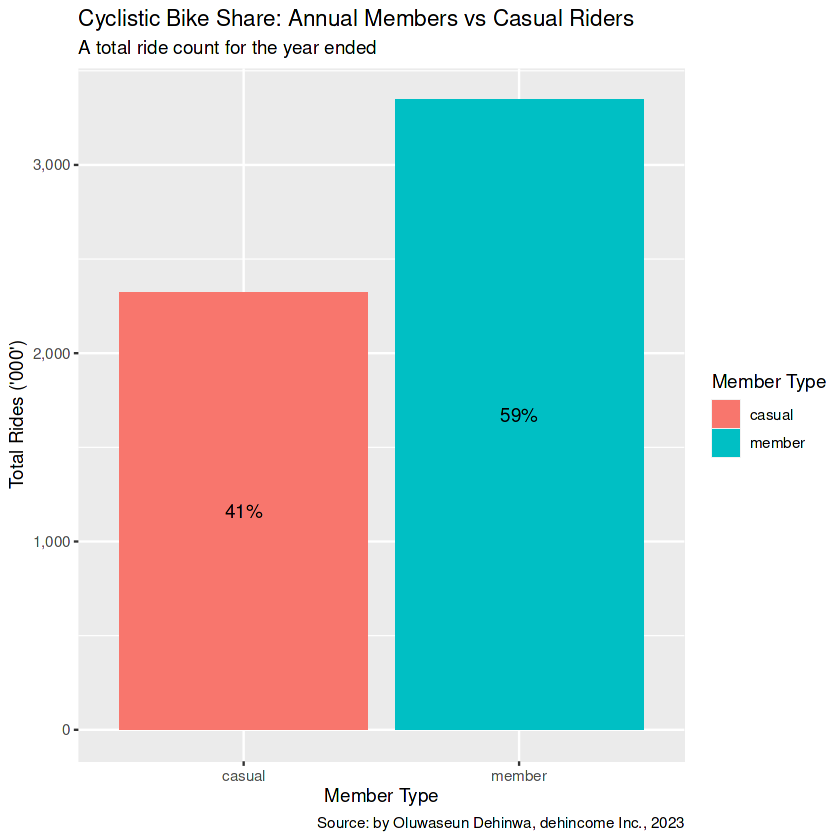

In [41]:
# Share: Member vs Casual
## Total count of members_casual Visualization 
total_count_com <- df_clean %>% 
  group_by(member_casual) %>% 
  summarise(count_of_rides = n()) %>% 
  mutate(per_cent = sprintf("%d%%", round(count_of_rides / sum(count_of_rides) * 100))) %>% 
  mutate(per_cent = gsub("%", "", per_cent)) %>% 
  mutate(per_cent = as.numeric(per_cent))

ggplot(data = total_count_com, aes(x = member_casual, y = count_of_rides, fill = member_casual)) +
  geom_col() +
  labs(x = "Member Type", y = "Total Rides ('000')", fill = "Member Type", caption = "Source: by Oluwaseun Dehinwa, dehincome Inc., 2023") +
  scale_y_continuous(labels = function(x) format(x/1000, big.mark = ",", decimal.mark = ".", scientific = FALSE)) + 
  geom_text(aes(label = paste0(per_cent, "%"), y = count_of_rides), position = position_stack(vjust = 0.5))+
  ggtitle("Cyclistic Bike Share: Annual Members vs Casual Riders", "A total ride count for the year ended")

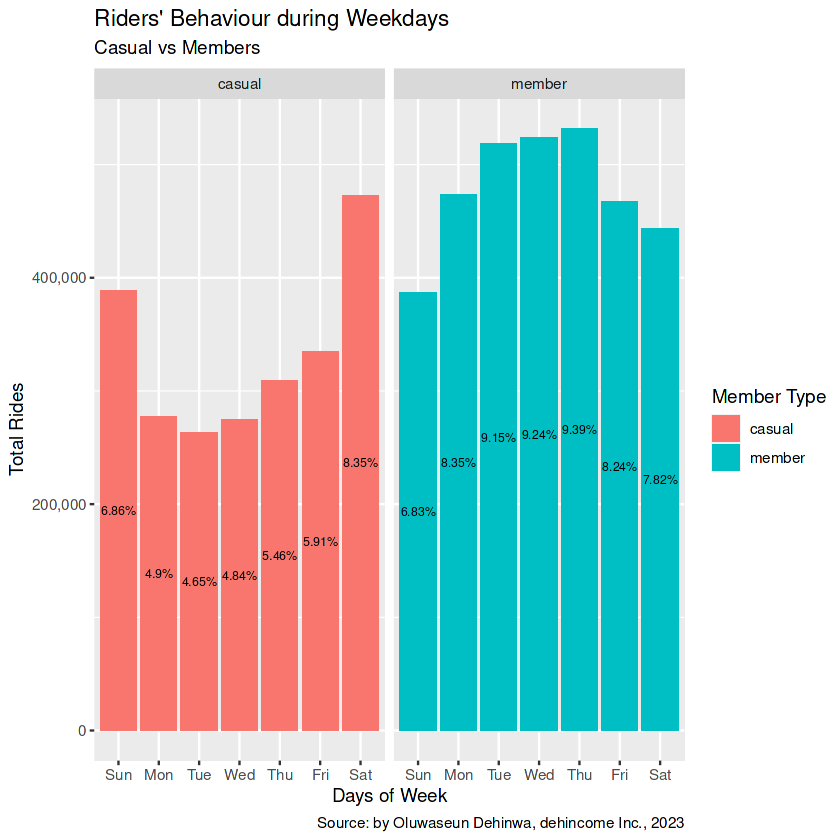

In [42]:
#Share: Weekly behaviour
## Comparison by day_of_week visualization
day_count_viz <- df_clean2 %>% 
  group_by(day_of_week, member_casual) %>% 
  summarise(count_of_days = n(),.groups = "drop")%>% 
  mutate(per_cent = sprintf("%g%%",round(count_of_days/ sum(count_of_days) * 100,2)))

ggplot(data = day_count_viz, aes(x = day_of_week, y = count_of_days, fill = member_casual)) +
  geom_col() +
  labs(x = "Days of Week", y = "Total Rides", fill = "Member Type", caption = "Source: by Oluwaseun Dehinwa, dehincome Inc., 2023") +
  scale_y_continuous(labels = function(x) format(x, big.mark = ",", decimal.mark = ".", scientific = FALSE)) + 
  geom_text(aes(label = paste0(per_cent), y = count_of_days), position = position_stack(vjust = 0.5), size = 2.5) +
  ggtitle("Riders' Behaviour during Weekdays", "Casual vs Members")+
  facet_wrap(~member_casual, ncol = 2)

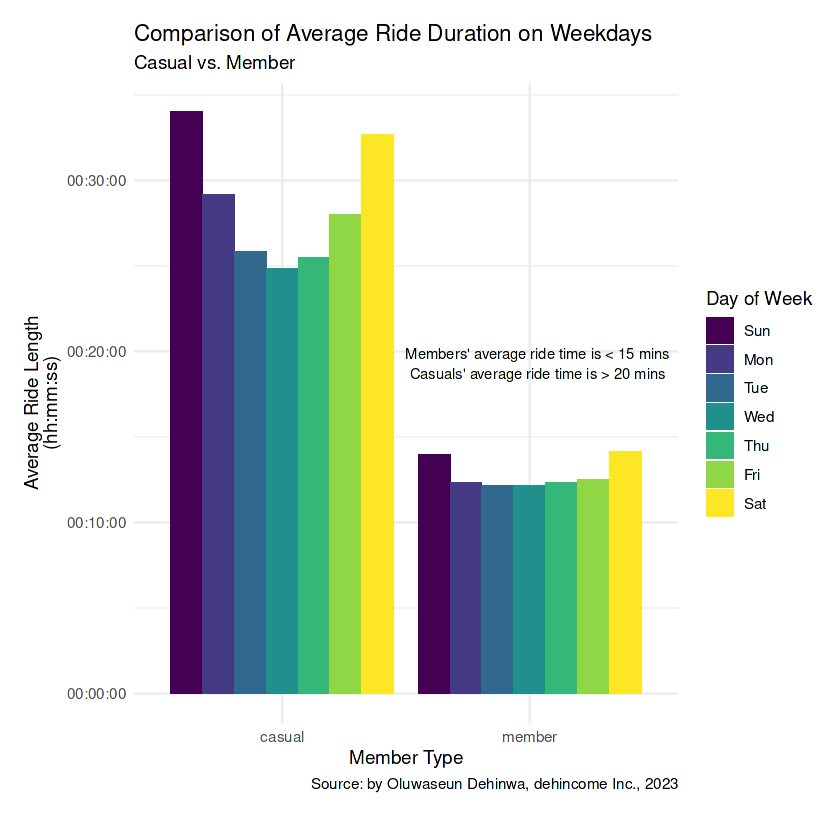

In [43]:
#Share: Average ride comparison
avg_ride_length_wkcom <- df_clean2 %>% 
  group_by(day_of_week, member_casual) %>% 
  summarise(average_ride_length = round_hms(as_hms(mean(ride_length)), digits = -1),
            .groups = "drop")

ggplot(avg_ride_length_wkcom, aes(x = member_casual, y = average_ride_length, fill = day_of_week)) +
  geom_bar(position = "dodge", stat = "identity") +
  labs(x = "Member Type", y = "Average Ride Length\n(hh:mm:ss)", fill = "Day of Week", caption = "Source: by Oluwaseun Dehinwa, dehincome Inc., 2023") +
  theme_minimal() +
  ggtitle("Comparison of Average Ride Duration on Weekdays", "Casual vs. Member")+
  annotate("text", x = 2.031, y = -2, label = "Members' average ride time is < 15 mins\nCasuals' average ride time is > 20 mins", hjust = 0.5, vjust = -10, color = "black", size = 3) +
  theme(plot.margin = unit(c(0.5, 0.5, 1, 0.5), "cm"))

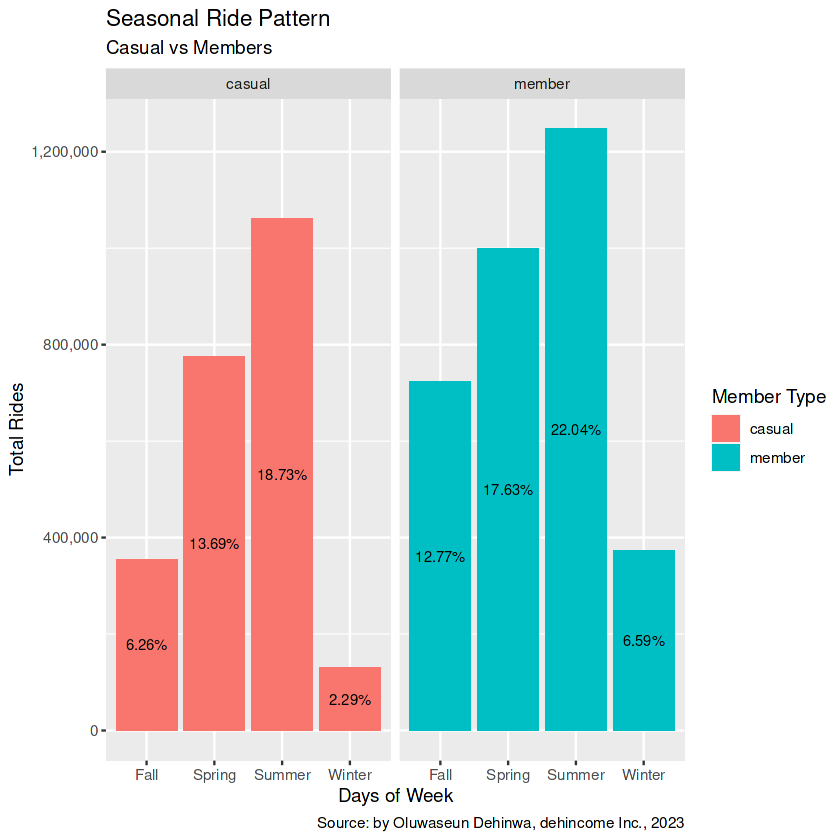

In [44]:
# Share : Seasonal behaviour
## Count by seasons of the year
season_count_com_viz <- df_clean2 %>%
  group_by(member_casual, yearly_season) %>%
  summarise(count_season = n(),.groups = "drop") %>%
  mutate(per_cent = sprintf("%g%%",round(count_season/ sum(count_season) * 100,2)))

ggplot(data = season_count_com_viz, aes(x = yearly_season, y = count_season, fill = member_casual)) +
  geom_col() +
  labs(x = "Days of Week", y = "Total Rides", fill = "Member Type", caption = "Source: by Oluwaseun Dehinwa, dehincome Inc., 2023") +
  scale_y_continuous(labels = function(x) format(x, big.mark = ",", decimal.mark = ".", scientific = FALSE)) + 
  geom_text(aes(label = paste0(per_cent), y = count_season), position = position_stack(vjust = 0.5), size = 3) +
  ggtitle("Seasonal Ride Pattern", "Casual vs Members")+
  facet_wrap(~member_casual, ncol = 2)

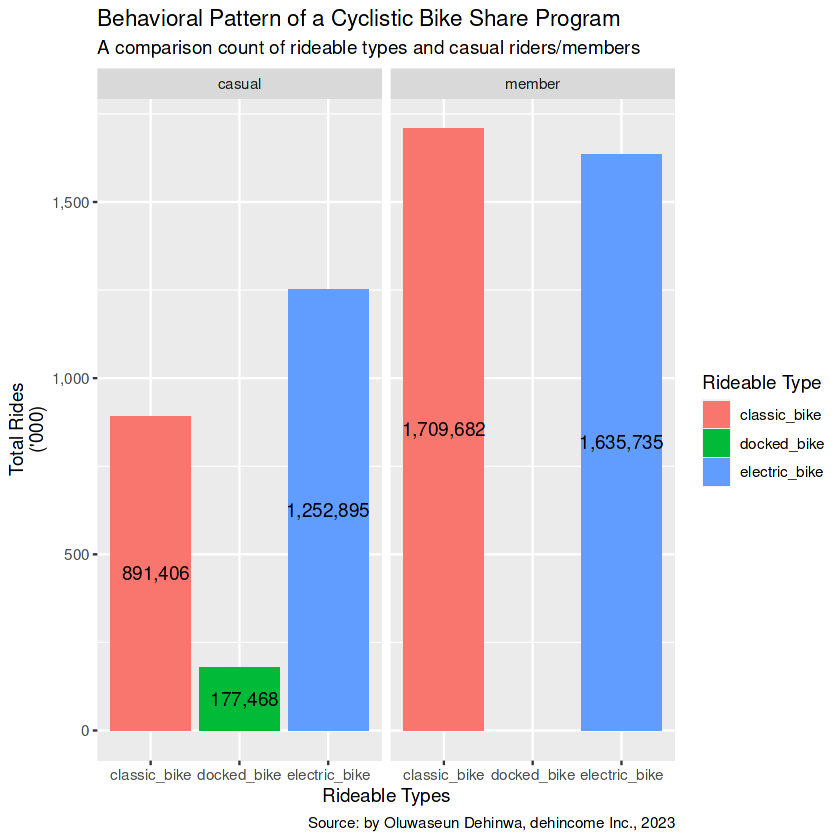

In [45]:
# Share: Rideable Type Comparison
## Rideable type and Casual_Member by total count
ride_type_com <- df_clean2 %>% 
  group_by(rideable_type, member_casual) %>% 
  summarise(count_rideable_type = n(),.groups = "drop") 
  ## spread(rideable_type, count_rideable_type)

ggplot(data = ride_type_com, aes(x = rideable_type, y = count_rideable_type, fill = rideable_type)) +
  geom_col() +
  labs(x = "Rideable Types", y = "Total Rides\n('000)", fill = "Rideable Type", caption = "Source: by Oluwaseun Dehinwa, dehincome Inc., 2023") +
  scale_y_continuous(labels = function(x) format(x/1000, big.mark = ",", decimal.mark = ".", scientific = FALSE)) + 
  geom_text(aes(label = format(count_rideable_type, big.mark = ","), y = count_rideable_type), position = position_stack(vjust = 0.5))+
  ggtitle("Behavioral Pattern of a Cyclistic Bike Share Program", "A comparison count of rideable types and casual riders/members")+
  facet_wrap(~member_casual, ncol = 2)

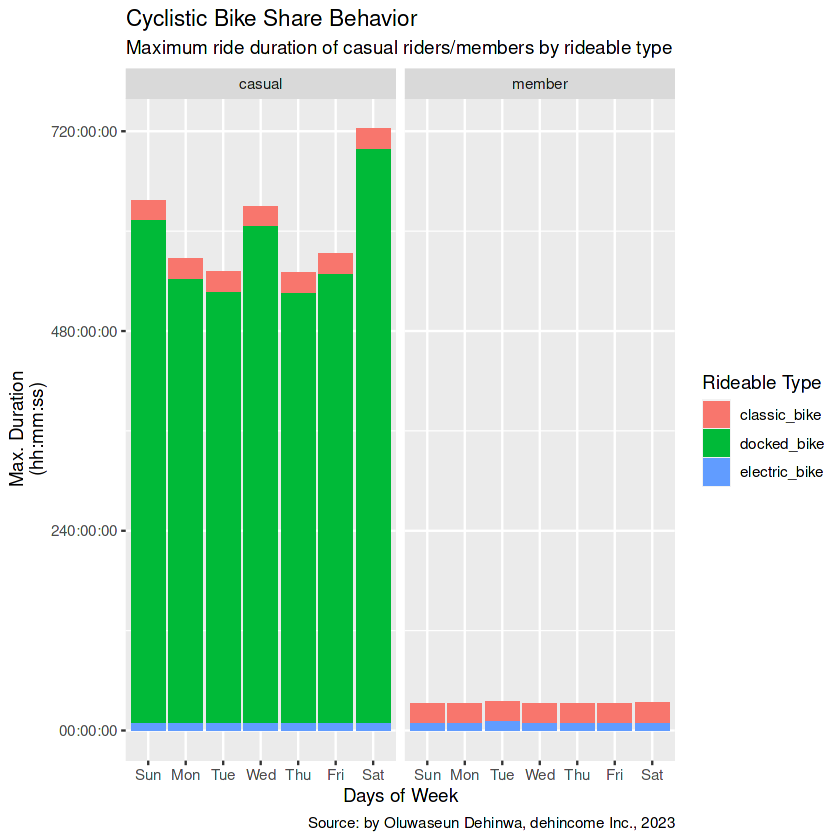

In [46]:
# Share: Comparison of ride duration by rideable type and member/casual
## Max comparison of ride_length by rideable type and member/casual
max_ride_type_a <- df_clean2 %>% 
  group_by(day_of_week, rideable_type, member_casual) %>% 
  summarise(max_ride_by_week = as_hms(max(ride_length)),
            .groups = "drop")

ggplot(data = max_ride_type_a, aes(x = day_of_week, y = max_ride_by_week, fill = rideable_type)) +
  geom_col() +
  labs(x = "Days of Week", y = "Max. Duration\n(hh:mm:ss)", fill = "Rideable Type", caption = "Source: by Oluwaseun Dehinwa, dehincome Inc., 2023") +
  ##scale_y_continuous(labels = function(x) format(x/1000, big.mark = ",", decimal.mark = ".", scientific = FALSE)) + 
  ggtitle("Cyclistic Bike Share Behavior", "Maximum ride duration of casual riders/members by rideable type")+
  facet_wrap(~member_casual, ncol = 2)

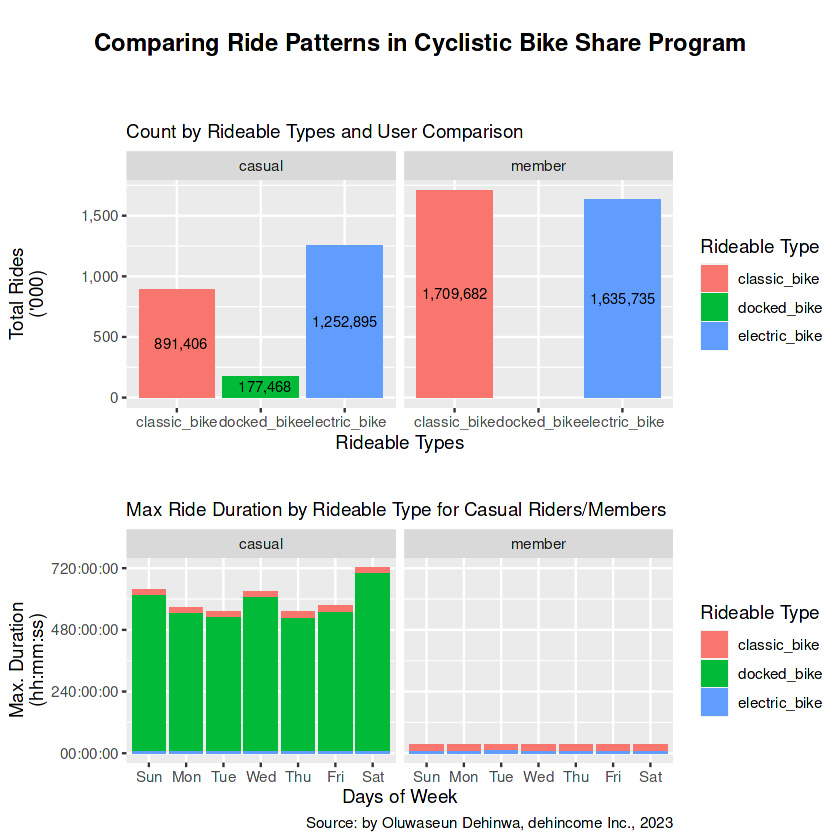

In [47]:
# Share: Chart Combination

# First chart
ride_type_com_chart <- ggplot(data = ride_type_com, aes(x = rideable_type, y = count_rideable_type, fill = rideable_type)) +
  geom_col() +
  labs(x = "Rideable Types", y = "Total Rides\n('000)", fill = "Rideable Type") +
  scale_y_continuous(labels = function(x) format(x/1000, big.mark = ",", decimal.mark = ".", scientific = FALSE)) + 
  geom_text(aes(label = format(count_rideable_type, big.mark = ","), y = count_rideable_type), position = position_stack(vjust = 0.5),size = 3) +
  ggtitle(" ", "Count by Rideable Types and User Comparison") +
  facet_wrap(~member_casual, ncol = 2)

# Second plot
max_ride_type_chart_b <- ggplot(data = max_ride_type_a, aes(x = day_of_week, y = max_ride_by_week, fill = rideable_type)) +
  geom_col() +
  labs(x = "Days of Week", y = "Max. Duration\n(hh:mm:ss)", fill = "Rideable Type", caption = "Source: by Oluwaseun Dehinwa, dehincome Inc., 2023") +
  ggtitle(" ", "Max Ride Duration by Rideable Type for Casual Riders/Members") +
  facet_wrap(~member_casual, ncol = 2)

# Combine plots vertically
combined_chart <- plot_grid(ride_type_com_chart, max_ride_type_chart_b, ncol = 1, align = "v", axis = "tb")


# Adding title to combined plot
title_plot <- ggdraw() + draw_label("Comparing Ride Patterns in Cyclistic Bike Share Program", fontface = "bold", x = 0.5, hjust = 0.5)
combined_chart_with_title <- plot_grid(title_plot, combined_chart, ncol = 1, rel_heights = c(0.1, 0.9))

# Display combined plot
combined_chart_with_title

# Act

Based on the findings presented in this report, I have drawn conclusions and developed recommendations for key stakeholders. These recommendations aim to inform their decision-making process and ensure they are well-informed about the analyzed data.

## a. Conclusion
Throughout the analysis stage, I examined rider behavior and made the following observations;

1. The total number of rides for the year was 5,667,186, with 41% being casual riders and 59% being members. Although casual riders accounted for a relatively high number of rides during the year, the majority of riders were members. Thus, converting active casual riders into annual members could help the organization achieve its objectives.

2. Among all the total rides, only casual riders utilized docked bikes, and they also had the highest ride length.

3. On average, casual riders had longer ride lengths than members, resulting in a higher overall average ride length for casual riders.

4. Both casual and annual members tend to ride more during the fall, spring and summer season of the year with the exception of casual member in the fall season.

## b. Recommendation

1. Develop targeted promotions to convert casual members into annual members.

2. Introduce a promotion and discount during the peak seasons of fall, spring, and summer.

3. Consider a limitation clause for casual riders that would allow them to use the bike share for a maximum period of hours (maybe two or more hours), while offering unlimited hours to annual members. This could encourage casual riders who frequently ride for longer periods of time to subscribe to an annual membership.